In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def read_game_data(file_path):
    games = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:  # Skip empty lines
                continue
            try:
                game_data = json.loads(line)
                games.append(game_data)
            except json.JSONDecodeError:
                print(f"Warning: Skipping invalid JSON line: {line}")
    return games

In [13]:
file_path = 'game_data.txt'
games = read_game_data(file_path)

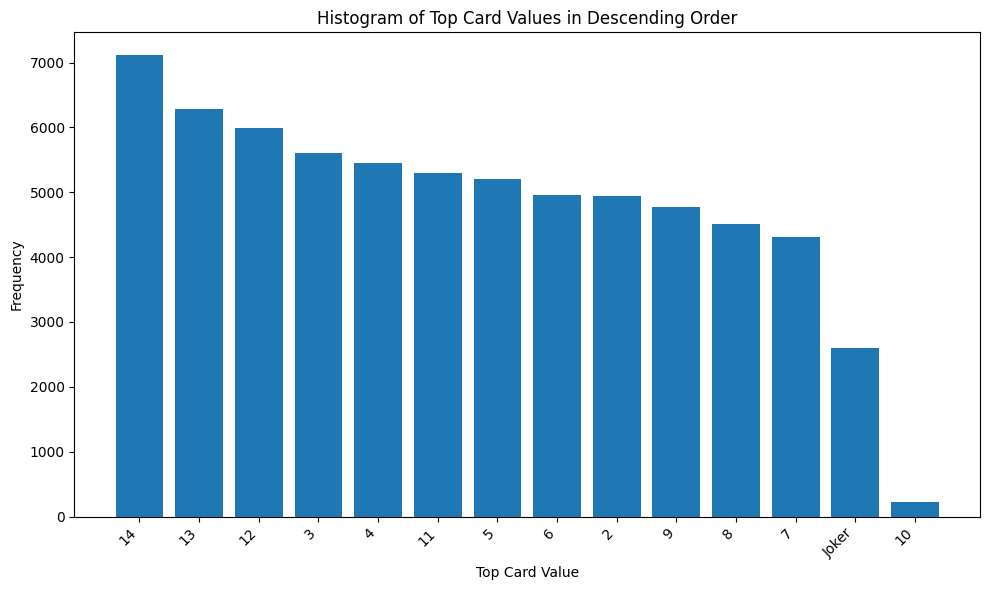

In [14]:
def top_card_hist(games):
    # Extract top cards from the game data and get their values
    top_card_values = [game['top_card'].split(' ')[0] for game in games if game['top_card']]

    # Count the occurrences of each top card value
    top_card_value_counts = Counter(top_card_values)

    # Sort the top card values by frequency in descending order
    sorted_top_card_values = sorted(top_card_value_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_value_names = [value[0] for value in sorted_top_card_values]
    sorted_value_counts = [value[1] for value in sorted_top_card_values]

    # Create a histogram of top card values in descending order
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_value_names, sorted_value_counts)
    plt.xlabel('Top Card Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Top Card Values in Descending Order')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_card_hist(games)

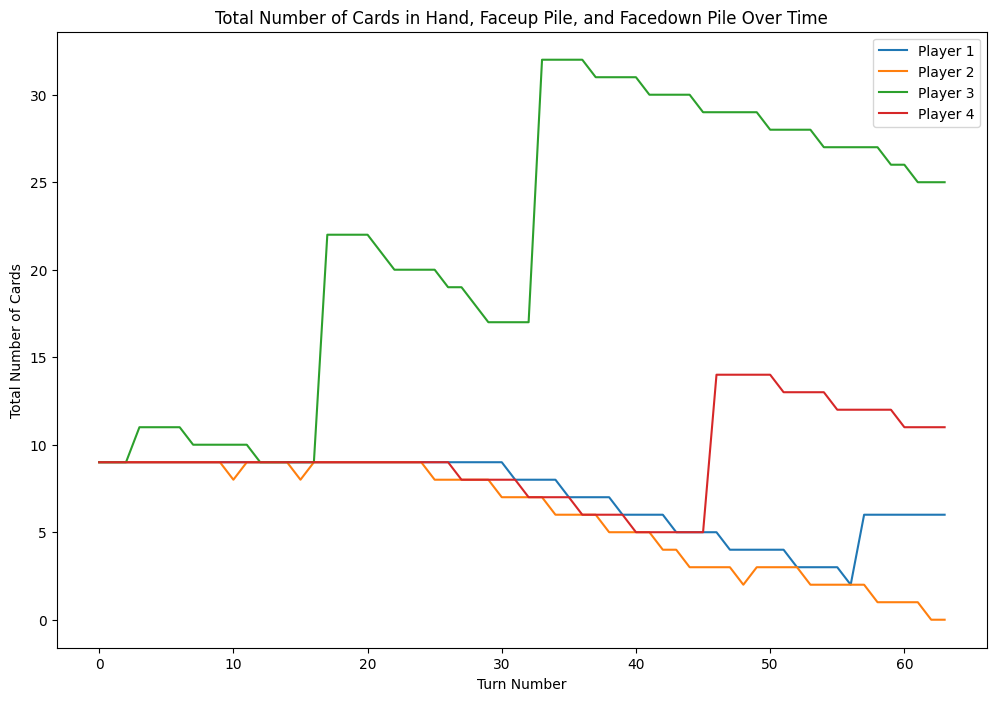

In [15]:
def player_hand_sizes(games, game_number=6):
    # Filter the data for a specific game
    single_game_data = [turn for turn in games if turn['game_number'] == game_number]

    # Find the number of players
    num_players = len(single_game_data[0]['num_cards_in_hands'])

    # Initialize a list to store the total number of cards for each player
    total_cards_players = [[] for _ in range(num_players)]

    # Iterate through each turn and calculate the total number of cards for each player
    for turn in single_game_data:
        for player_idx in range(num_players):
            total_cards = (
                turn['num_cards_in_hands'][player_idx] +
                turn['num_face_up_cards'][player_idx] +
                turn['num_face_down_cards'][player_idx]
            )
            total_cards_players[player_idx].append(total_cards)

    # Plot the data
    plt.figure(figsize=(12, 8))
    for player_idx, total_cards in enumerate(total_cards_players):
        plt.plot(total_cards, label=f'Player {player_idx + 1}')
    plt.xlabel('Turn Number')
    plt.ylabel('Total Number of Cards')
    plt.title('Total Number of Cards in Hand, Faceup Pile, and Facedown Pile Over Time')
    plt.legend()
    plt.show()

# Example usage
player_hand_sizes(games)


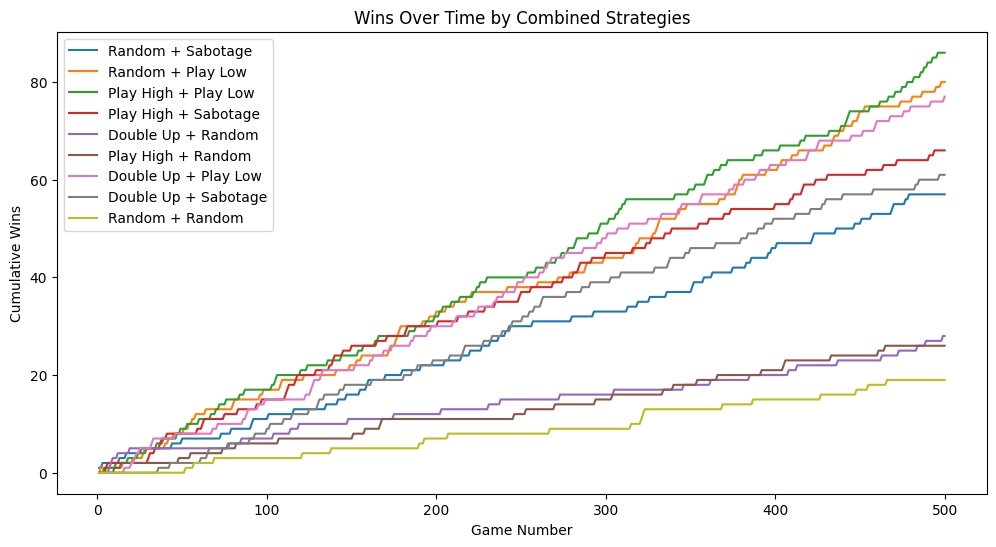

In [16]:
def visualize_wins_over_time_by_combined_strategies(game_data):
    combined_strategy_wins_over_time = {}
    max_game_number = max(game['game_number'] for game in game_data)

    for game in game_data:
        winner = game['winner']
        if winner is not None:
            faceup_strategy = game['players_faceup_strategy'][winner - 1]
            regular_strategy = game['regular_play_strategies'][winner - 1]
            combined_strategy = f"{faceup_strategy} + {regular_strategy}"

            if combined_strategy not in combined_strategy_wins_over_time:
                combined_strategy_wins_over_time[combined_strategy] = [0] * max_game_number

            combined_strategy_wins_over_time[combined_strategy][game['game_number'] - 1] += 1

    # Cumulative wins over time
    for strategy, wins in combined_strategy_wins_over_time.items():
        combined_strategy_wins_over_time[strategy] = [sum(wins[:i + 1]) for i in range(len(wins))]

    # Plotting the combined strategy wins over time
    plt.figure(figsize=(12, 6))
    for strategy, wins in combined_strategy_wins_over_time.items():
        plt.plot(range(1, len(wins) + 1), wins, label=strategy)
    plt.title('Wins Over Time by Combined Strategies')
    plt.xlabel('Game Number')
    plt.ylabel('Cumulative Wins')
    plt.legend()
    plt.show()

# Visualize the wins over time by combined strategies
visualize_wins_over_time_by_combined_strategies(games)


In [124]:
game_number = 0
single_game_data = [turn for turn in games if turn['game_number'] == game_number]
single_game_data



[]